In [1]:
# Importing the first couple necessary libraries

# import the important packages
import pandas as pd  # library used for data manipulation and analysis

import numpy as np  # library used for working with arrays

import matplotlib.pyplot as plt  # library for visualization

import seaborn as sns  # library for visualization

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/Users/anjali/Desktop/greenbuildings.csv')

In [5]:
green_df = data.copy()
green_df.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [15]:
# To find the type of each column
green_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7894 entries, 0 to 7893
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CS_PropertyID      7894 non-null   int64  
 1   cluster            7894 non-null   int64  
 2   size               7894 non-null   int64  
 3   empl_gr            7820 non-null   float64
 4   Rent               7894 non-null   float64
 5   leasing_rate       7894 non-null   float64
 6   stories            7894 non-null   int64  
 7   age                7894 non-null   int64  
 8   renovated          7894 non-null   int64  
 9   class_a            7894 non-null   int64  
 10  class_b            7894 non-null   int64  
 11  LEED               7894 non-null   int64  
 12  Energystar         7894 non-null   int64  
 13  green_rating       7894 non-null   int64  
 14  net                7894 non-null   int64  
 15  amenities          7894 non-null   int64  
 16  cd_total_07        7894 

In [7]:
# Removing rows with lower occupancy rates (less than 10% of space)
filtered_green_df = green_df[green_df['leasing_rate'] >= 10]
filtered_green_df.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [9]:
# Looking at the median rent between green buildings and non-green buildings
# Calculate median rents for green and non-green buildings
median_rent_green = filtered_green_df[filtered_green_df['green_rating'] == 1]['Rent'].median()

median_rent_non_green = filtered_green_df[filtered_green_df['green_rating'] == 0]['Rent'].median()

print('Median Rent for Green Bldgs: $' , median_rent_green)
print('Median Rent for Non-Green Bldgs: $' , median_rent_non_green)

Median Rent for Green Bldgs: $ 27.6
Median Rent for Non-Green Bldgs: $ 25.03


# CREATING PLOTS

## Distribution of Rent by Green Certification Status:
This plot will directly compare the rents of green-certified versus non-certified buildings, showing if there is a significant rent premium for green buildings.

In [19]:
# Converting the needed columns to categories
filtered_green_df.loc[:, 'green_rating'] = filtered_green_df['green_rating'].astype('category')
filtered_green_df.loc[:, 'class_a'] = filtered_green_df['class_a'].astype('category')
filtered_green_df.loc[:, 'class_b'] = filtered_green_df['class_b'].astype('category')

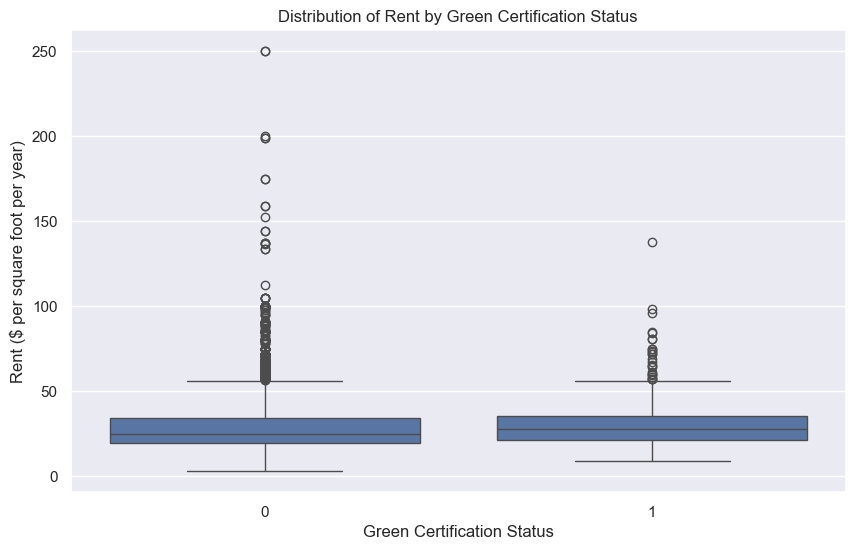

In [21]:
#Distribution of Rent by Green Certification Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='green_rating', y='Rent', data=filtered_green_df)
plt.title('Distribution of Rent by Green Certification Status')
plt.xlabel('Green Certification Status')
plt.ylabel('Rent ($ per square foot per year)')

# If you want to cut off some of the outliers
#plt.xticks([0, 1], ['Non-Green', 'Green'])
#plt.ylim(0,150)
plt.show()

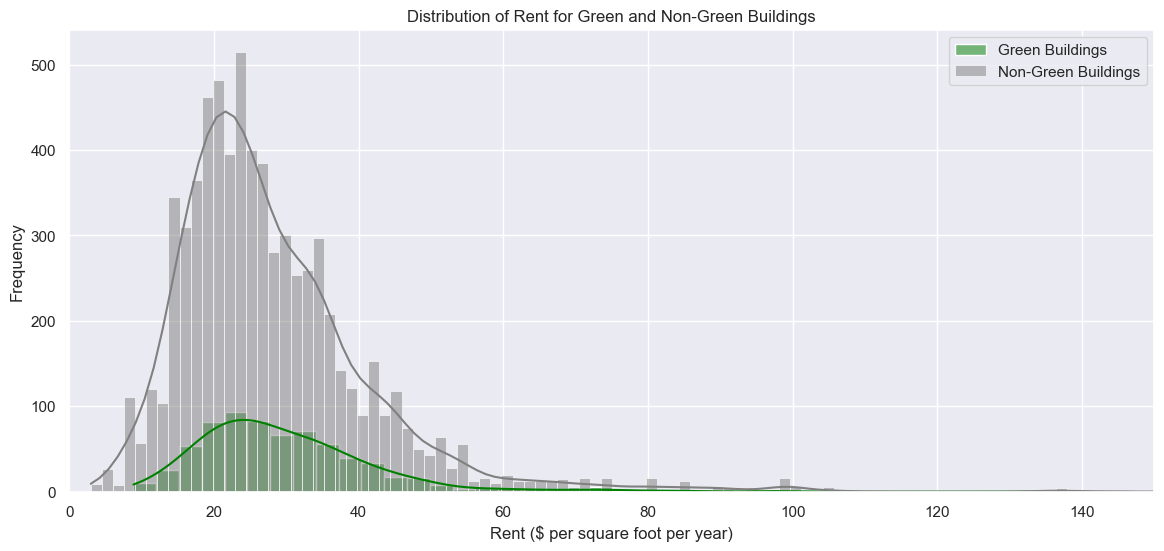

In [25]:
# Histogram of rents for green and non-green buildings
plt.figure(figsize=(14, 6))
sns.histplot(filtered_green_df[filtered_green_df['green_rating'] == 1]['Rent'], color='green', label='Green Buildings', kde=True)
sns.histplot(filtered_green_df[filtered_green_df['green_rating'] == 0]['Rent'], color='gray', label='Non-Green Buildings', kde=True)
plt.title('Distribution of Rent for Green and Non-Green Buildings')
plt.xlabel('Rent ($ per square foot per year)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,150)
plt.show()

THE HISTOGRAM OF THE DISTRIBUTION OF RENT OF GREEN AND NON-GREEN BUILDINGS

From the graph, the distribution of the non-green buildings seem to be much higher and is at its peak between $20  and $30 per square foot. The frequency of green buildings, seem to show a lower, broader distributions and has a slight peak between $25  and $30 per square foot. 

The distributions of both the plots also overlap, and show that some of the green buildings do charage more, however there are many non-green buildings within that same range. 



THE BOX PLOT OF RENT OF GREEN AND NON-GREEN BUILDINGS

The median rent of green certified buildings does seem to be higher than for the non-green certified buildings. This does match with the note, that green certified buildings do demand a premium. The box plot for the non-green buildings does seem to have more outliers, showing that the range of rents is more broader and shows variability in the rent. 
However, since the box plot of green certified buildings also have outliers, this shows that the green ceertification is not the only thing that influence the rent, but there may be other factors present as well


Overall, from the graphs above, Green Buildings to tend to have slightly higher avg. rent. But since there is a significant overlap between the distributions, it does show that the green certification is not the only factor affecting and influencing the rent prices. This may be due to other factors like location, class building, and other confounding variables. 

## Rent vs. Size Scatter Plot by Green Certification
This scatter plot will help determine if the size of the building influences the rent differently for green-certified versus non-certified buildings. It will provide insights into whether larger green buildings command higher rents.

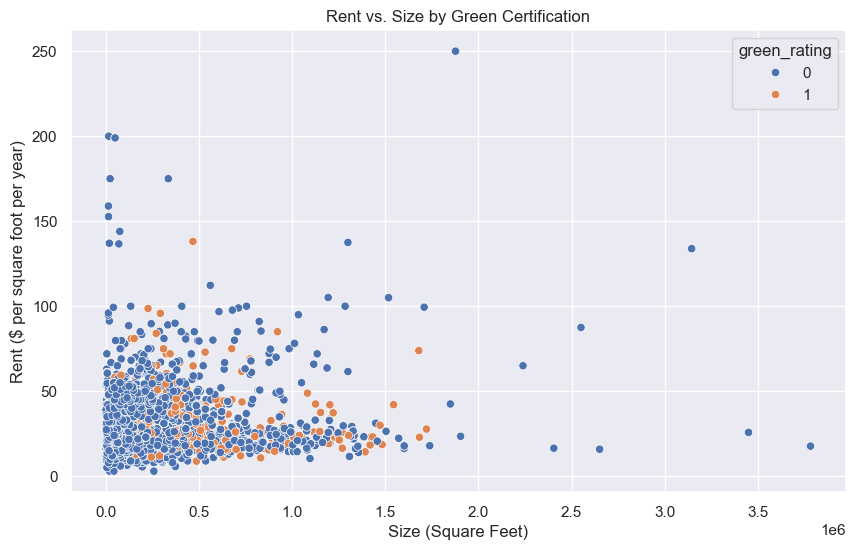

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=filtered_green_df)
plt.title('Rent vs. Size by Green Certification')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

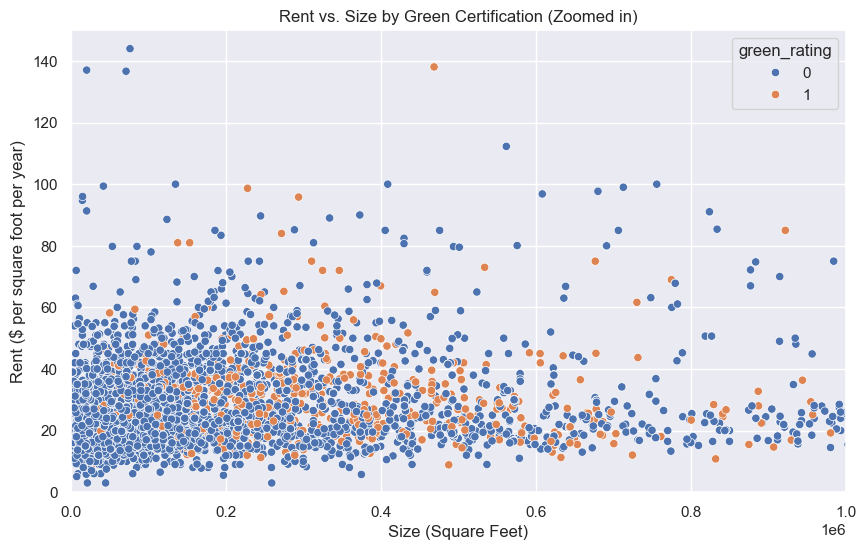

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=filtered_green_df)
plt.title('Rent vs. Size by Green Certification (Zoomed in)')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Rent ($ per square foot per year)')

# Set the x and y limits to zoom into the cluster
plt.xlim(0, 1e6)  # Adjust these values based on where your cluster is
plt.ylim(0, 150)
plt.show()

From the Scatter Plots above, a large cluster of the buildings is mostly concentrated in the lower rent and the smaller size range. It seems that, regardless of the certification, most of the buildings do seem to charge a rent that is below $50 per sq. foot, and the size of the rental space available in the building also seem to be smaller. 

From a closer examination within the cluster, there still does seem to be a significant overlap between the two types of buildings, which shows that there is not really a correlation between the variables. The rent distribution does seem to remain on a similar range across the both types within the size range as well. 

Overall, the scatterplots does also support the idea that while green-certified buildings do have higher rents on average, the difference if not just due to the green certification. 

## Rent vs. Leasing Rate 
This plot will show the relationship between rent and occupancy (leasing rate) and how it might differ between green and non-green buildings. High occupancy rates at higher rents could indicate stronger demand for green buildings.

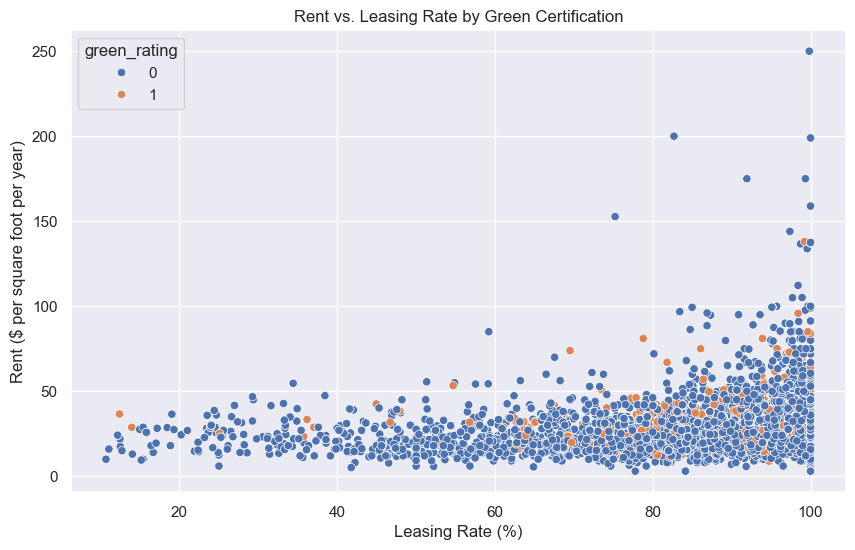

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='leasing_rate', y='Rent', hue='green_rating', data=filtered_green_df)
plt.title('Rent vs. Leasing Rate by Green Certification')
plt.xlabel('Leasing Rate (%)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

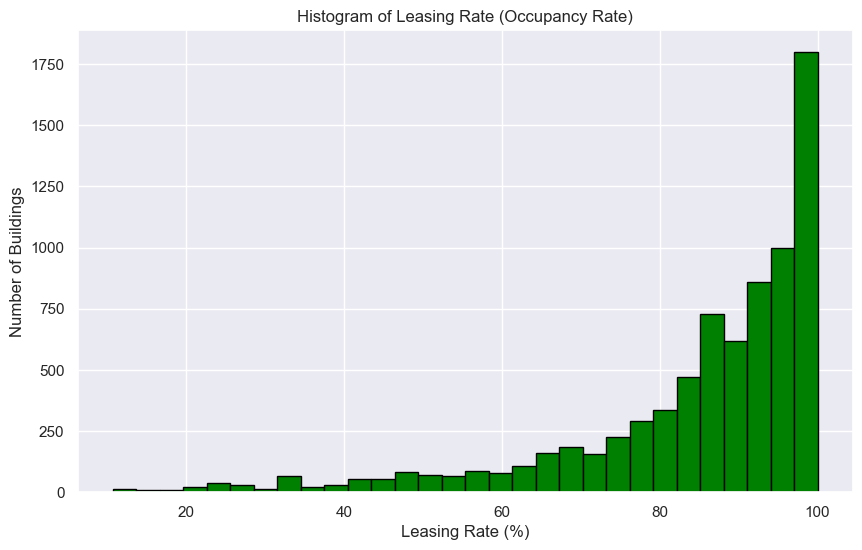

In [50]:
# Plotting the histogram for leasing_rate (occupancy rate)
plt.figure(figsize=(10, 6))
plt.hist(filtered_green_df['leasing_rate'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Leasing Rate (Occupancy Rate)')
plt.xlabel('Leasing Rate (%)')
plt.ylabel('Number of Buildings')
plt.grid(True)
plt.show()

The scatter plot comparing the Rent vs Leasing Rate by Green Certification, shows that both of the buildings, again follow a similar trend, where higher leasing rates are slightly correlated with higher rents. However, there does not seem to be a clear or distinct seperation between the two types of buildings showing that the green certification alone is not the most significant factor. 

The histogram shows an overall distribution of the leasing rates across all the types of buildings. The majority of buildings does have high occupancy rates, with a lot  of buildings having leasing rates close to 100%. There are fewer buildings with lower leasing rates, indicating that most properties maintain high occupancy. This shows that if most buildings are fully occupied, the impact of green certification on leasing rate may be minimal, meaning that other factors could be more influential.


Overall, from both of these graphs, there does seem to be a slight correlation between a higher rent and higher leasing rates. However, Green certification does seem to be a strong facto that influences the relationship. 

## Rent by Building Class (A, B, C) and Green Certification
This bar chart will reveal if the impact of green certification on rent is consistent across different building classes, helping to understand whether green buildings in higher-quality classes command a premium.

/var/folders/wx/b26pnv_x531cnc4zjql78hc40000gn/T/ipykernel_70554/3438783399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_green_df['building_class'] = filtered_green_df.apply(lambda row: 'A' if row['class_a'] == 1 else 'B' if row['class_b'] == 1 else 'C', axis=1)
/var/folders/wx/b26pnv_x531cnc4zjql78hc40000gn/T/ipykernel_70554/3438783399.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='building_class', y='Rent', hue='green_rating', data=filtered_green_df, ci=None)


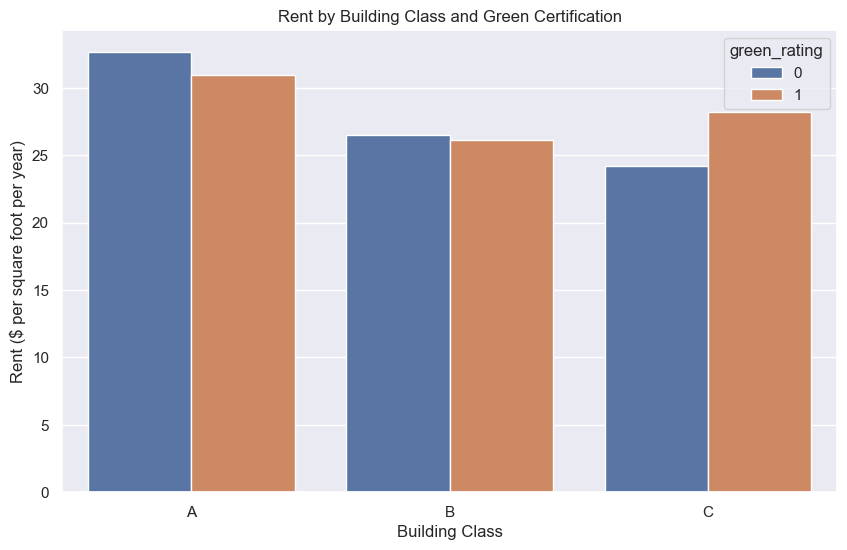

In [42]:
plt.figure(figsize=(10, 6))
filtered_green_df['building_class'] = filtered_green_df.apply(lambda row: 'A' if row['class_a'] == 1 else 'B' if row['class_b'] == 1 else 'C', axis=1)
sns.barplot(x='building_class', y='Rent', hue='green_rating', data=filtered_green_df, ci=None)
plt.title('Rent by Building Class and Green Certification')
plt.xlabel('Building Class')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

Text(0, 0.5, 'Number of Buildings')

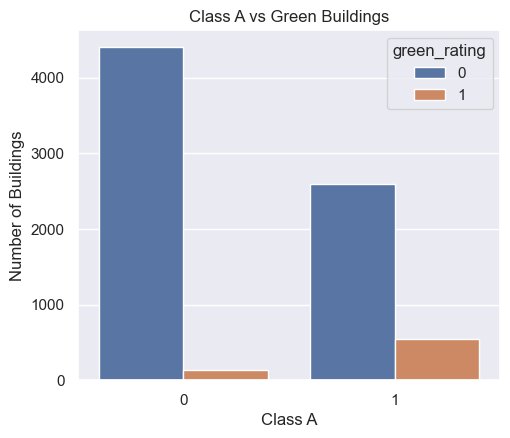

In [54]:
plt.figure(figsize=(12, 10))

# Plot 2: Class A vs Green Buildings
plt.subplot(2, 2, 2)
sns.countplot(x='class_a', hue='green_rating', data=filtered_green_df)
plt.title('Class A vs Green Buildings')
plt.xlabel('Class A')
plt.ylabel('Number of Buildings')


Class A Buildings (The highest quality) - Non-Green buildings seem to have higher rents on the average compared to the green certified buildings. From the second bar plot, showing the count of the buildings in Class A, that is seperated by the green certification status, there are significantly more non-green Class A buildings compared to green-certified ones. The lower number of the Green buildings within class A, may show why the green certification doesn't really lead to higher rents, possibly because these buildings may already have a seperate premium rents due to the quality. 

In Contrast, Class B Buildings, and Class C buildings do have higher average rents for green-certified buildings compared to the non-green certified buildings. For Class B, there is a very slight difference in the avg. rent between the two types of buildings. In Class C however, a significant difference can be seen in the rents for the two types of buildings.

The trend does seem to vary per class of the building, with green certification associated with higher rents in lower-class buildings (B and C) but not in the highest-quality buildings (Class A). This can shows that the value of green certification is more towards the lower class buildings, due to maybe some environmental benefits. 



## Comparison of Cluster Rent to Building Rent by Green Certification
By comparing each building’s rent to the average rent in its cluster, this scatter plot will show if green-certified buildings are commanding a rent premium over their direct competitors within the same area

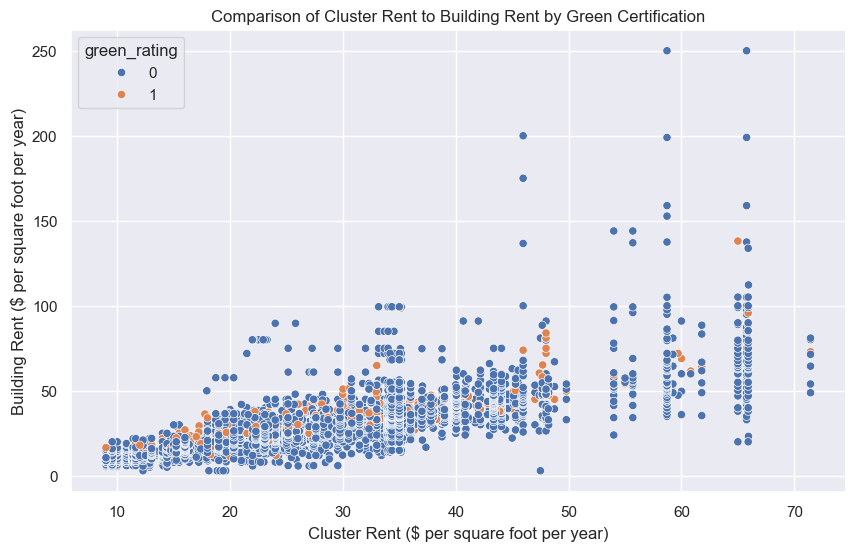

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=filtered_green_df)
plt.title('Comparison of Cluster Rent to Building Rent by Green Certification')
plt.xlabel('Cluster Rent ($ per square foot per year)')
plt.ylabel('Building Rent ($ per square foot per year)')
plt.show()

There does seem to be a positive correlation between the cluster rent and the building rent, showing that the as the rent in cluster rent (local market) increases, the rent of the overall charges to the tenants in the buildings increse as well. This seems to be for both, the green certified and the non-green buildings, and does not show a seperation between the two types. 

Overall, This scatterplot does show that the rent for green-certified buildings generally aligns with the market rents in their local clusters. But, green-certified buildings do no appear to completely show that they outperform the non-green buildings in terms of having a higher rent. 

## Rent Premium Histogram
This histogram will display the distribution of the rent premium (difference between building rent and cluster rent) for green and non-green buildings. It will help quantify how much more rent green buildings are generating relative to their non-green neighbors

/var/folders/wx/b26pnv_x531cnc4zjql78hc40000gn/T/ipykernel_70554/548262046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_green_df['rent_premium'] = filtered_green_df['Rent'] - filtered_green_df['cluster_rent']


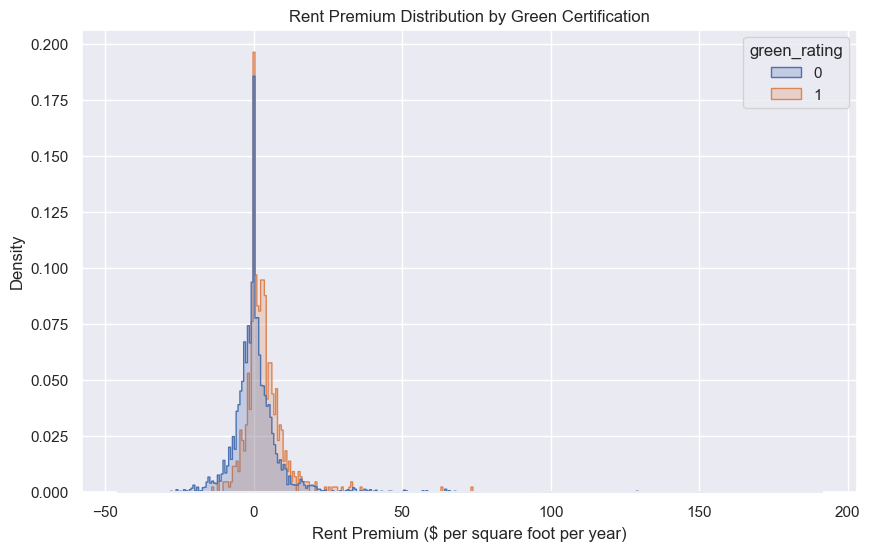

In [46]:
filtered_green_df['rent_premium'] = filtered_green_df['Rent'] - filtered_green_df['cluster_rent']
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_green_df, x='rent_premium', hue='green_rating', element="step", stat="density", common_norm=False)
plt.title('Rent Premium Distribution by Green Certification')
plt.xlabel('Rent Premium ($ per square foot per year)')
plt.ylabel('Density')
plt.show()

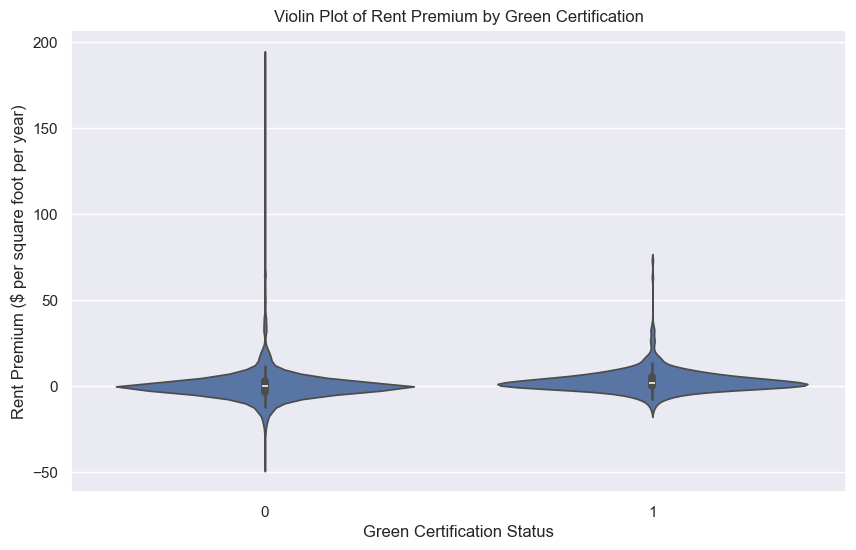

In [48]:
# Violin Plot for Rent Premium by Green Certification
plt.figure(figsize=(10, 6))
sns.violinplot(x='green_rating', y='rent_premium', data=filtered_green_df)
plt.title('Violin Plot of Rent Premium by Green Certification')
plt.xlabel('Green Certification Status')
plt.ylabel('Rent Premium ($ per square foot per year)')
plt.show()

From both the plots above, it can be seen that the green green certification does not appear to lead to a significant rent premium.
In the histogram, both green certified and the non-green buildings have a rent premium distribution that goes slightly above $0, indicating that most buildings charge rents close to the market average in their cluster. The distributions for green and non-green buildings are very similar, with only minor differences. The Violin plot, reinforces the histogram's findings, showing that green certification does not considerably affect the rent premium. The similarity in the distribution between the two types of the buildings implies that green certification is not a strong differentiator in commanding higher rents.

## Correlation Plot

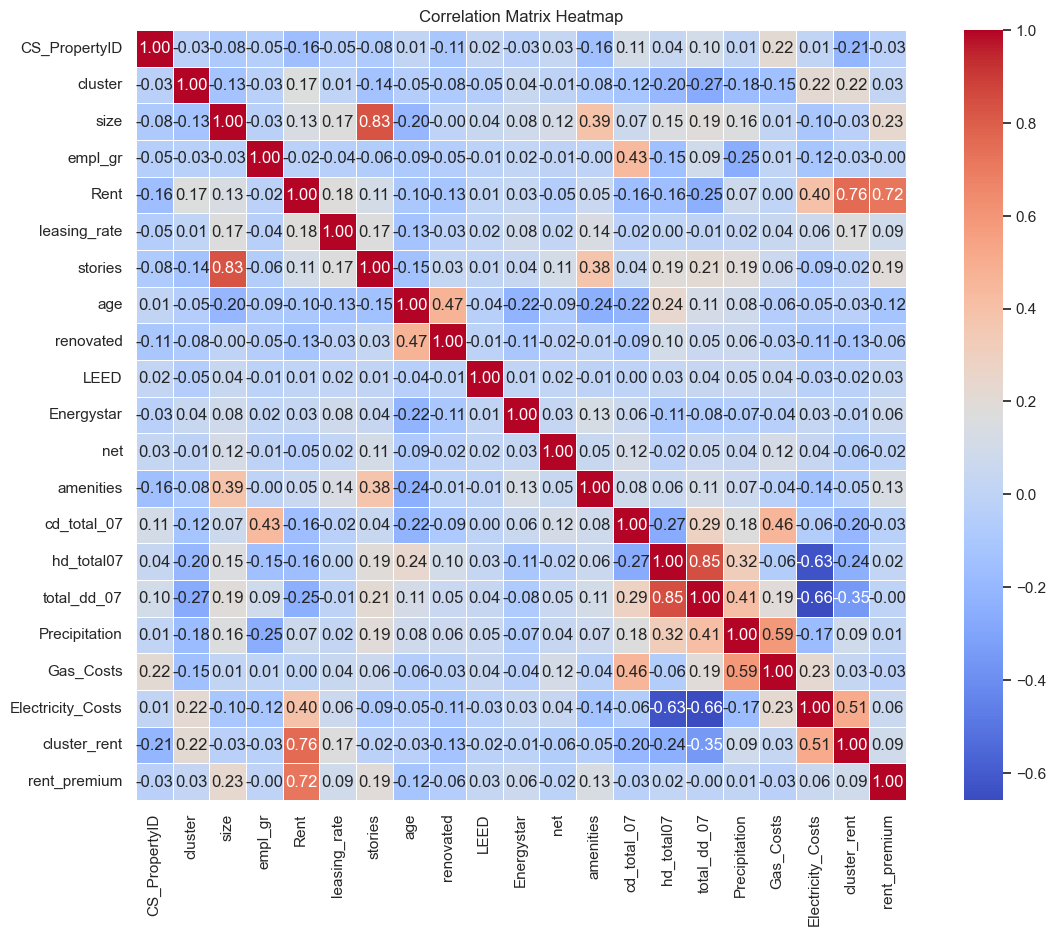

In [80]:
# Filter out non-numeric columns
numeric_df = filtered_green_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation plot above shows that size of the building has a strong positive correlation with the rent and the number of stories, while rent also correlates positively with leasing rates. 
There is a moderate correlation between electricity costs and total degree days (total_dd_07), indicating that regions with higher heat or even cold, demand tend to have higher electricity costs. 
Green certification indicators like (LEED and EnergyStar) show weak correlations with most variables, suggesting that green certification is not strongly linked to other building characteristics in this dataset.

# CONCLUSION

Based on the analysis of the different visualization graphs and plots, investing in a green certification for a new building in Austin does not appear to provide a consistently significant increase in rental revenue that would justify the additional 5% construction cost. It seems that the rent premiums for green-certified buildings, are in genaral, pretty aligned with the cluster rent (local market rents), showing no strong seperation or a difference from the non-green buildings. While some of the green-certified buildings do have a slightly higher rent, it does not seem to be a consistent pattern across different locations. An important variable to note is that the Class A buildings, which already would have premium rents, have a higher proportion of non-green buildings, whcih shows that these buildings often achieve those higher rents than the green certified buildings.  This suggests that the market does not currently place a significant premium on green certification in the highest-quality buildings, likely because these buildings already possess other desirable amenities that attract tenants.

RECOMMENDATIONS: If the new building is not a Class-A building, it would be difficult to recover from an investment that the builder has made, since the average returns are pretty low. There can be other reasons to consider to go green as well, in certain aspects, like attracting a specific subset of tenants who care about sustainabulity, protection against futute energy cost increases. 

Since some of green buildings, are larger in size, more younger, it can boost the buildings long-term value. There may be tax-breaks or even grants available for green-certified building, which can help cover certain additional costs. 